# 소프트맥스 회귀 보충
- 소프트맥스 회귀에서 텐서 shape을 중간중간 확인해보는 코드 추가하여 실행해보자.


- DataLoader
  - 데이터셋을 쉽게 로드하고 미니배치로 데이터를 나누어 모델 학습에 사용할 수 있도록 돕는 중요한 도구이다.
  - 주로 대규모 데이터셋을 처리할 때, 효율적으로 데이터를 불러오는 역할을 하며, 모델 학습이나 평가 중에 데이터를 잘 관리하여 처리 속도를 최적화할 수 있도록 한다.
- DataLoader의 역할
  - 1. 미니배치 생성: 데이터셋을 작은 배치 단위로 나누어 학습에 사용할 수 있도록 해준다.
  - 2. Shuffling: 학습 시 데이터셋의 순서를 무작위로 섞어서 모델이 데이터에 대한 순서 의존성을 학습하지 않도록 도와줌.
  - 3. 병렬 처리(Parallelism): 멀티스레드를 사용하여 데이터를 병렬로 로드할 수 있어 데이터 입출력 속도를 높여준다.
  - 4, 커스터마이징: 데이터 증강, 정규화 등과 같은 데이터를 병렬로 로드할 수 있어 데이터 입출력 속도를 높여준다.
  - 즉, DataLoader는 대규모 데이터셋의 효율적인 관리를 통해 학습 프로세스를 간호화하고 최적화는데 중요한 역할을 한다.


   
    print("W: ", list(model.parameters())[0].shape, "B: ", list(model.parameters()).shape)
    # training_epochs = 15
    for epoch in range(training_epochs):
      avg_cost = 0
      total_batch = len(data_loader)

      for idx, (x_train, y_train) in enumerate(data_loader):
        # 배치크가가 100이므로 아래의 연산에서 x_train은 (100, 784)의 텐서가 된다.
        print("Original: ", x_train.shape)
        x_train = x_train.view(-1, 28*28)
        print("Reshaped: ", x_train.shape)
        # 레이블은 one-hot encoding이 된 상태가 아니라 0 ~ 9의 정수이다.
        
        prediction = model(x_train)
        print("Result: ", prediction.shape)
        cost = criterion(prediction, y_train)



- 1. torchvision의 컴퓨터 비전 데이터는 (batch_size, channel, height, width) 형태의 shape을 가짐.
- 2. 이를 소프트맥스 회귀에서 활용하기 위해 (batch_size, data_size) 형태로 reshape 진행
- 3. 이후 X*W^T + B 연산이 linear 객체에서 일어나며, (batch_size, class_num) 형태의 결과값을 도출함.
  - W.shape: (10, 784) 형태 텐서
  - B: (10) 형태 텐서로써 각 클래스 확률에 해당하는 출력값에 각각 더해진다.

- 일반적으로 신경망 모델 설명에서 batch_size에 해당하는 dimension은 표시되어 있지 않음에 유의해야 함.
- 실제 학습이 수행될 때는 미니 배치 경사하강법으로 수행하기 때문에, batch_size 만큼의 개수에 해당하는 데이터에 대해 일괄 연산을 수행하며, PyTorch에서는 일반적으로 dim 0이 batch_size에 해당됨.

- 신경 세포 및 활동 전위
  - 신경 세포(뉴런)은 다수의 뉴런으로부터 정보를 전달받으며, 역치 이상의 자극이 들어오면 전기 신호를 발생시켜 다른 뉴런으로 정보를 전달하게 됨.



# 퍼셉트론
- 실제 신경세포를 본따서 다수의 입력을 받은 뒤 하나의 결과를 내는 데이터 처리 구조를 퍼셉트론이라고 함.
- 입력값 X와 가중치 W의 곱을 합산한 뒤 그 값을 비선형 함수로 변형시켜 출력함.
  - 비선형 함수 == 계단 함수(step function)이라고 함.
  - 실제 뉴런에서의 역치에 해당하는 임계치를 θ로 표현함.

- 퍼셉트론의 입력값을 취합한 후 출력을 만들기 위해 사용되는 함수 == 활성 함수(activation function)
  - 일반적으로 비선형 함수가 많이 쓰이지만, 경우에 따라 선형 함수도 활용된다.

- 로지스틱 회귀는 활성 함수가 sigmoid인 퍼셉트론이라고 볼 수 있음.
- 소프트맥스 회귀는 활성 함수가 softmax라고 볼 수 있음.
  - 로지스틱 회귀: H(X) = sigmoid(W*X + B)
  - 소프트맥스 회귀: H(X) = softmax(W*X + B)
  - 초기 퍼셉트론: H(X) = step(W*X + B)
  - 선형 회귀: H(X) = linear(W*X + B)
    - 이 때, linear() == "y = x"를 의미함.

- 퍼셉트론에서 각 데이터가 존재하는 단계를 층(layer)이라고 함.
- 퍼셉트론은 최소한 입력, 출력 2개의 층이 존재하며, 이렇게 단 2개의 층(입력층, 출력층)만으로 이루어진 퍼셉트론을 "단층 퍼셉트론"이라고 함.


# 다층 퍼셉트론(MLP)
- 총 3개 이상의 층으로 이루어진 퍼셉트론을 다층 퍼셉트론(Multi-Layer Perceptron, MLP)라고 함.
- 입력과 출력을 제외한 나머지 층은 은닉층(hidden layer)라고 하는데, 은닉층이 2개 이상인 MLP는 심층 신경망(deep neural network, DNN)이라고 함.

- 여기서는 MLP의 활성 함수는 sigmoid라고 가정함.
- z는 활성 함수가 적용되기 전의 값이고, h 및 o는 활성 함수가 적용된 값을 의미한다.
- MLP에서 각 층의 출력값은 이전 층의 출력값들로 표현 가능
- (ex) 순전파 예시
      input = [[x1], [x2]]
      hidden layer1 = [[W1, W3], [W2, W4]]
      input of hidden layer2 = [[h1 = sigmoid(z1)], [h2 = sigmoid(z2)]]
      hidden layer2 = [[W5, W7], [W6, W8]]
      result of hidden layer2 = [[z3], [z4]]
      output = [[o1 = sigmoid(z3)], [o2 = sigmoid(z4)]]

- 다층 퍼셉트론에서는 가중치를 어떻게 학습시켜야 하나?
  - 역전파 방법을 통해 가중치를 학습 시킨다.


# 역전파
  - MLP 및 심층 신경망의 파라미터 학습은 역전파 과정을 통해서 이루어진다.
  - 순전파: 데이터에 대한 예측값을 계산할 때는 "입력층 → 은닉층 → 출력층" 순으로 계산이 진행된다.
  - 역전파: 가중치 학습 때는 출력층부터 가중치 업데이트가 진행되므로 역전파라고 함.
  - 미분의 연쇄법칙(chain rule)을 이용해서 출력에 가까운 가중치부터 차례차례 업데이트 해나가게 됨.
  - 여기서 loss function을 MSE로 가정한다.
  
  - 1. 역전파 1단계
    - 출력층과 마지막 은닉층 사이에 있는 가중치를 업데이트 한다.
    - 미분의 연쇄 법칙(chain rule) 활용
      - ∂(Total error) / ∂W = (∂(Total error) / ∂(Output)) * (∂(Output) / ∂Z) * (∂Z / ∂W)
    - W += W - lr*(∂(Total error) / ∂W) → 이 식을 통해서 가중치 업데이트 진행

  - 2. 역전파 2단계
    - 은닉층이 2개라고 가정하고 이것에 대해서 설명하겠다.
    - 입력층과 첫번째 은닉층 사이의 가중치를 업데이트 해야 하며, W에 대한 미분값을 계산해야 한다.

  - 에러를 계산하는데 쓰인 출력값에 가까운 가중치일수록 먼저 미분값을 계산하기가 편하며, 그 이전에 쓰인 가중치들은 앞서 계산한 미분값들을 바탕으로 차례차례 계산할 수 있다.
  - 역전파 과정을 통해 가중치를 업데이트하면, 1 iteration의 학습이 수행됨.
  
- 활성 함수
  - sigmoid의 경우, sigmoid의 끝 부분 기울기의 절대값을 보면, 굉장히 작기 때문에, 경사하강법으로 학습할 때, 가중치의 변화량이 매우 작아진다.
  - 0에 가까운 미분값들이 여러 번 곱해지게 되면 역전파를 통한 학습(업데이트) 효과가 거의 없다.
    - 이러한 현상을 기울기 소실(vanishing gradient)라고 한다.

  - 기울기 소실 문제를 해결할 수 있는 간단한 형태의 활성 함수로써 ReLu함수가 있다.
  - ReLu: 0 이상의 구간에서는 선형 함수( y = x )와 같으며, 음수 구간에서는 전부 0의 값을 출력함.
    - 직선의 한 군데를 꺾어서 비선형으로 만들었다고 생각하면 됨.
  - 수학적으로는 x = 0에서의 미분값이 정의되지 않으나, 실제 구현 상에서는 x = 0에서의 미분값을 0으로 사용하는 경우가 많다.    



# 다층 퍼셉트론을 이용한 MNIST 분류
- 인공신경망 구현
  - MNIST 문제를 MLP를 통해 해결하고자 한다.
  


    import torch
    import torchvision.datasets as dsets
    import torchvision,transforms as transforms
    from torch.utils.data import DataLoader
    import torch.nn as nn
    import matplotlib.pyplot as plt
    import random

    USE_CUDA = torch.cuda.is_available() # GPU가 사용 가능하면 True, 아니면 False를 리턴함.
    device = torch.device("cuda" if USE_CUDA else "cpu") # GPU가 사용 가능하면 사용, 아니면 CPU 사용
    print(f'{device}를 사용하여 학습한다.')

    # for reproducibility(재현성을 위해서 설정하는 것임.)
    random.seed(777)
    torch.manual_seed(777)
    if device == 'cuda':
      torch.cuda.manual_seed_all(777)



  - MLP부터는 GPU로 학습을 진행하는 것이 훻씬 빠르다.

  - 모델 코드
    - nn.Sequential은 다양한 nn.Module들을 직렬로 연결한 리스트라고 볼 수 있다.
    - 콤마(,)로 구분하여 원하는 만큼 nn.Module들을 생성자 함수에 입력할 수 있으며, 그러면 입력한 순서대로 forward 시 각 모듈들이 실행된다.



    class MLP(torch.nn.Module):
      def __init__(self):
        super(MLP, self).__init__()

        self.model = nn.Sequential(
          nn.Linear(784, 100),
          nn.ReLU(),
          nn.Linear(100, 100),
          nn.ReLU(),
          nn.Linear(100,10))
      
      def forward(self, x):
        return self.model(x)
    
  

  - 학습 코드
    - GPU를 사용할 때는 텐서 및 nn.Module들을 GPU 메모리로 옮겨주어야 함.
      - 앞에서 device를 설정하였기 때문에, to(device)를 통해 GPU 변수로 변경가능
      - GPU 변수로 옮기고 싶다면, cuda()를 통해서도 가능함.
    - Adam은 SGD보다 발전된 형태의 경사하강법의 일종이다. 널리 쓰이지만 가끔 과적합 문제가 발생한다.


    # hyperparameters
    training_epochs = 3
    batch_size = 100

    # MNIST dataset
    mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(), download = True)

    mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True)

    # dataset loader
    data_loader = DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True)

    # MLP 객체 생성
    model = MLP().to(device)
    criterion = nn.CrossEntropyLoss().cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

    # 학습 loop
    for epoch in range(training_epochs):
      avg_cost = 0
      total_batch = len(data_loader)

      for idx, (x_train, y_train) in enumerate(data_loader):
        x_train = x_train.view(-1, 28*28).to(device)
        y_train = y_train.to(device)

        outputs = model(x_train)
        cost = criterion(outputs, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

      print('Epoch:','%04d' %(epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
    print('Learning finished')



  - 테스트 코드 1
    - 단 3epoch만 학습시켰음에도 소프트맥스 회귀의 15epoch 학습 후 88%보다 훨씬 높은 성능을 보임.



    # 테스트 데이터를 사용하여 모델을 테스트한다.
    with torch.no_grad(): # torch.no_grad()를 하면, gradient 계산을 수행하지 않는다.
      x_test = mnist_test.data.view(-1, 28*28).float().to(device)
      y_test = mnist_test.targets.to(device)

      prediction = model(x_test)
      correct_prediction = torch.argmax(prediction, 1) == y_test
      accuracy = correct_prediction.float().mean()
      print('Accuracy:', accuracy.item())




  - 테스트 코드 2
    - 어떤 샘플들이 틀린 것인지 직접 확인해보기
      
      
      
    with torch.no_grad():
      # MNIST 테스트 데이터에서 틀린 샘플 중 무작위로 하나를 뽑아서 예측을 해본다.
      wrong_indices = (correct_prediction == 0).nonzero(as_tuple=True)[0] # 틀린 샘플들 인덱스 추출
      r = random.randint(0, len(wrong_indices)-1)
      r = wrong_indices[r].cpu().item()
      x_single_data = mnist_test.data[r:r+1].view(-1,28*28).float().cuda()
      y_single_data = mnist_test.targets[r:r+1].cuda()

      print('Label:',y_single_data.item())
      single_prediction = model(x_single_data)
      print('Prediction:', torch.argmax(single_prediction,1).item())

      plt.imshow(mnist_test.data[r:r+1].view(28,28), cmap = 'Greys', interpolation='nearest')
      plt.show()

       

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
print(f'GPU가 사용가능 여부: {USE_CUDA}')
device = torch.device("cuda" if USE_CUDA else "cpu")
print(f'다음 기기로 학습한다: {device}')

GPU가 사용가능 여부: True
다음 기기로 학습한다: cuda


In [3]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [9]:
class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP,self).__init__()

    self.model = nn.Sequential(
        nn.Linear(784,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,10)
    )
  def forward(self,x):
    return self.model(x)

In [13]:
# hyperparameters
training_epochs = 3
batch_size = 100

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:11<00:00, 899584.78it/s] 


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 134055.86it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1284427.15it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 10467323.50it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [7]:
# dataset loader
data_loader = DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True)

In [10]:
# MLP 객체 생성
model = MLP().to(device)
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [14]:
# 학습 loop
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    x_train = x_train.view(-1, 28*28).to(device)
    y_train = y_train.to(device)

    outputs = model(x_train)
    cost = criterion(outputs, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:','%04d' %(epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost = 0.244781151
Epoch: 0002 cost = 0.134417817
Epoch: 0003 cost = 0.106764004
Learning finished


In [15]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면, gradient 계산을 수행하지 않는다.
  x_test = mnist_test.data.view(-1, 28*28).float().to(device)
  y_test = mnist_test.targets.to(device)

  prediction = model(x_test)
  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9627999663352966


Label: 8
Prediction: 2


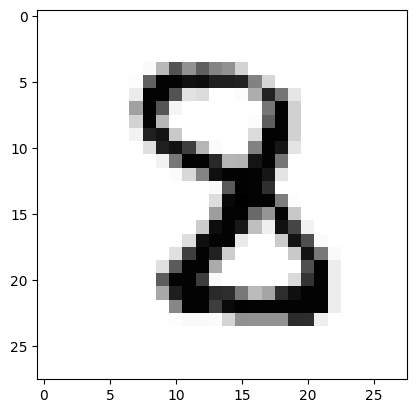

In [16]:
with torch.no_grad():
  # MNIST 테스트 데이터에서 틀린 샘플 중 무작위로 하나를 뽑아서 예측을 해본다.
  wrong_indices = (correct_prediction == 0).nonzero(as_tuple=True)[0] # 틀린 샘플들 인덱스 추출
  r = random.randint(0, len(wrong_indices)-1)
  r = wrong_indices[r].cpu().item()
  x_single_data = mnist_test.data[r:r+1].view(-1,28*28).float().cuda()
  y_single_data = mnist_test.targets[r:r+1].cuda()

  print('Label:',y_single_data.item())
  single_prediction = model(x_single_data)
  print('Prediction:', torch.argmax(single_prediction,1).item())

  plt.imshow(mnist_test.data[r:r+1].view(28,28), cmap = 'Greys', interpolation='nearest')
  plt.show()

# 머신러닝 모델의 평가
- 훈련 데이터 셋으로 학습 완료된 머신러닝 모델의 평가는 테스트 데이터 셋으로 이루어짐.
  - 테스트 데이터는 절대로 학습 시에는 활용되면 안됨. 학습 과정에서 테스트 데이터가 포함되어 있고, 이후에 다시 테스트 데이터로 성능을 평가한다면 컨닝과 같다.

- 학습을 언제 마칠 것인지 결정하기 위해, 혹은 학습 도중 모델의 성능을 가늠해보기 위해서 훈련 데이터 셋 중 일부를 따로 떼어 평가용으로 쓰기도 하는데 이를 검증 데이터 셋이라고 함.

- 전체 데이터(Original Data)
  - 훈련(Training)-테스트(Testing)
  - 훈련(Training)-검증(Validation)-테스트(Testing)

# 과적합
- 머신러닝 모델을 학습시키는 목적: 새로운 데이터(테스트 데이터 혹은 아예 새로운 추론 대상)에 대해 분류 또는 회귀를 잘 수행하고자 하는 것임.
  - 이미 답을 알고 있는 학습 데이터 셋에 대해서만 잘 동작하는 머신러닝 모뎋을 만들거라면, 규칙 기반 프로그램으로 대체할 수 있다.
  - 과적합된 모델은 번거롭고 무겁기 때문에 쓸 이유가 없다.

- 머신러닝 모델이 학습 데이터 셋에서 좋은 성능을 보인다고 해서 반드시 새로운 데이터에 대해서 좋은 성능을 보이는 것은 아니다.

- 과적합이란 무엇인가?
  - 전혀 학습이 되지 않은 상태 == 학습이 부족한 상태 ==  과소 적합
  - 학습 데이터 셋 내의 측정 오차까지 모델에 반영해버려서 실제 x, y의 상관관계보다 훨씬 복잡한 관계를 표현하게 됨. 이렇게 필요 이상으로 과하게 학습되는 형상을 과적합이라고 한다.

- 최신 심층신경망 구조들은 주어진 데이터 셋 내의 상관관계를 학습하는 능력이 탁월하지만, 과적합이 일어나면 테스트 정확도가 대폭 감소하는 문제가 발생함.

- 데스트 데이터 셋은 학습 도중에는 활용할 수 없으므로, 검증 데이터 셋을 이용해서 테스트 데이터 셋에서 얼마나 잘 작동할지 가늠해보는 수 밖에 없다.

- 테스트 성능이 최대가 되는 이 시점을 학습 도중 어떻게 알 수 있을까?
  - 검증 데이터 셋 성능이 최고점인 상태의 가중치 및 편향을 테스트에 활용함.
  - 조기 종료(Early Stopping)
    - 검증 데이터 셋을 활용한 매우 효과적인 과적합 방지 기법
    - 상세 과정
      - 1. 매 epoch마다 검증 데이터 셋에서의 성능을 측정
      - 2. 검증 데이터 셋에서의 성능이 최고치를 찍고 점점 안좋아지기 시작하면, 미리 정해둔 epoch 수 만큼은 기다림(예를 들어 5 epoch)
      - 3. 만약 미리 정해둔 epoch 수가 다하기 전에 다시 최고 성능이 갱신되면 학습을 계속함.
      - 4. 미리 정해둔 epoch 수가 다하도록 최고 성능이 갱신되지 않으면 학습을 종료하고, 검증 데이터 셋에서 가장 높은 성능을 보인 모델 가중치를 이용해 테스트를 진행함.

  - 조기 종료(Early Stopping) 예시
    - 검증 데이터 셋에서의 성능이 더 안좋아져도 기다리는 epoch 수를 보통 patience하고 지칭함.  
    - Patience가 3인 경우 예시
      - Epoch 4에서 검증 데이터 셋에서의 정확도가 90.32로 최고 성능을 달성함.
      - Eopch 5 ~ 7에서 연속 3번동안 최고 성능을 갱신하지 못하였으므로 patience가 소진되어 학습이 종료됨.
      - 최종 모델은 epoch 4에서 저장된 가중치 및 편향 사용
  
  - 조기 종료(Early Stopping)에서 patience의 필요성
    - 실제 딥러닝 학습 과정에서 보이는 loss 혹은 정확도 추이는 다소 불규칙한 모습을 보이므로 최고 성능 달성 후 성능이 떨어졌다고 바로 학습을 종료하면 더 좋은 모델을 얻을 기회를 잃을 수 있음.  
